In [32]:
# import modules 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 

In [33]:
df = pd.read_csv('../cleaning-preprocessing/cleaned_flight_data_with_target.csv')
df = df.astype(int)
df = df[df['DEP_DELAY'] >= 0]

7.091690178514654
1.9490099109115506
1.128778744700287
0.04226432997440612


/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


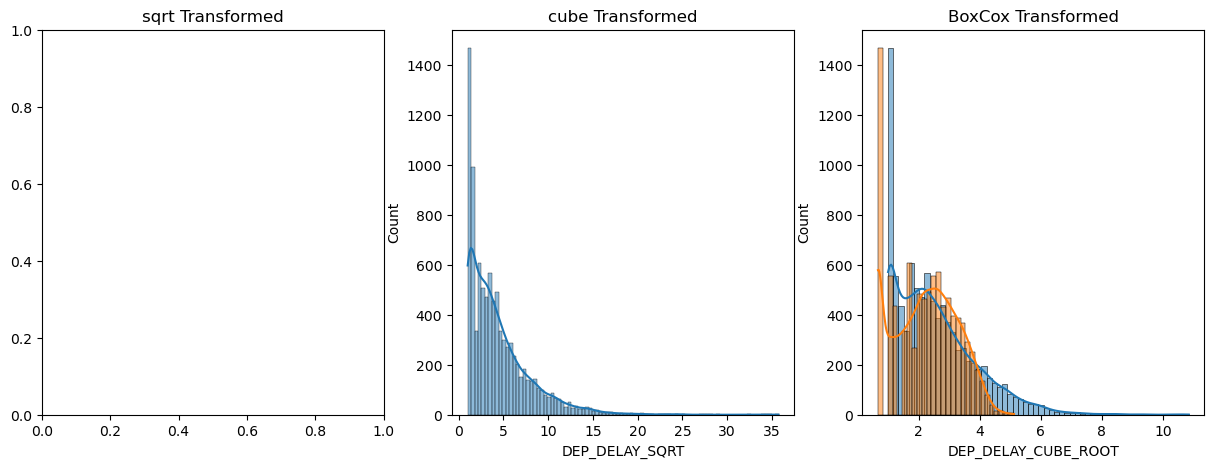

In [34]:
print(df['DEP_DELAY'].skew())  # If > 0.5 or < -0.5, transformation is needed

df['DEP_DELAY_shifted'] = df['DEP_DELAY'] - df['DEP_DELAY'].min() + 1
# df['DEP_DELAY_log'] = np.log1p(df['DEP_DELAY_shifted'])


df['DEP_DELAY_SQRT'] = np.sqrt(df['DEP_DELAY_shifted'])
df['DEP_DELAY_CUBE_ROOT'] = np.cbrt(df['DEP_DELAY_shifted'])

from scipy.stats import boxcox
df['DEP_DELAY_BOXCOX'], lambda_ = boxcox(df['DEP_DELAY_shifted'] + 1)  # Adding 1 to avoid issues with 0


print(df['DEP_DELAY_SQRT'].skew())
print(df['DEP_DELAY_CUBE_ROOT'].skew())
print(df['DEP_DELAY_BOXCOX'].skew())

# Graph

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['DEP_DELAY_SQRT'], kde=True, ax=axes[1])
axes[0].set_title('sqrt Transformed')

sns.histplot(df['DEP_DELAY_CUBE_ROOT'], kde=True, ax=axes[2])
axes[1].set_title('cube Transformed')

sns.histplot(df['DEP_DELAY_BOXCOX'], kde=True, ax=axes[2])
axes[2].set_title('BoxCox Transformed')

plt.show()


In [35]:
X = df.drop(columns=['DEP_DELAY','DEP_DELAY_shifted', 'DEP_DELAY_BOXCOX']) #Dropping DEP_DELAY Log/Sqrt transform cols
y = df['DEP_DELAY_BOXCOX'] # Target variable

In [36]:
from scipy.stats import boxcox

X['sch_dep_boxcox'], lambda_ = boxcox(X['sch_dep'] + 1)  #Top1 Feature 
X['CRS_DEP_M_boxcox'], lambda_ = boxcox(X['CRS_DEP_M'] + 1) #Top2 Feature
X['OP_UNIQUE_CARRIER_DL_boxcox'], lambda_ = boxcox(X['OP_UNIQUE_CARRIER_DL'] + 1)  #Top3 Feature

X['CRS_ELAPSED_TIME_boxcox'], lambda_ = boxcox(X['CRS_ELAPSED_TIME'] + 1)  #Top4 Feature
X['DISTANCE_boxcox'], lambda_ = boxcox(X['DISTANCE'] + 1)  #Top5 Feature
X['OP_UNIQUE_CARRIER_B6_boxcox'], lambda_ = boxcox(X['OP_UNIQUE_CARRIER_B6'] + 1)  #Top6  Feature

X['OP_UNIQUE_CARRIER_MQ_boxcox'], lambda_ = boxcox(X['OP_UNIQUE_CARRIER_MQ'] + 1)  #Top7  Feature
X['Wind_Speed_boxcox'], lambda_ = boxcox(X['Wind Speed'] + 1) #Top8  Feature
X['Pressure_boxcox'], lambda_ = boxcox(X['Pressure'] + 1) #Top7  Feature

# X = X.drop(columns=['sch_dep', 'DISTANCE', 'CRS_ELAPSED_TIME', 
#                     'OP_UNIQUE_CARRIER_DL', 'Wind Speed', 'CRS_DEP_M',
#                     'Pressure', 'OP_UNIQUE_CARRIER_MQ', 'OP_UNIQUE_CARRIER_B6', 
#                     'Condition_Cloudy / Windy', 'DEST_BWI', 'DEST_BUF',
#                     'DEST_BTV', 'DEST_LAX', 'DEST_BOS'
#                     ])



In [37]:
X['sch_dep_boxcox']

2         8.393665
8        15.502874
9        15.502874
14       15.502874
21       15.502874
           ...    
28811    18.127786
28815    18.127786
28816    17.254818
28817    17.254818
28818    17.254818
Name: sch_dep_boxcox, Length: 9271, dtype: float64

/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

Text(0.5, 1.0, 'Boxcox Transformed')

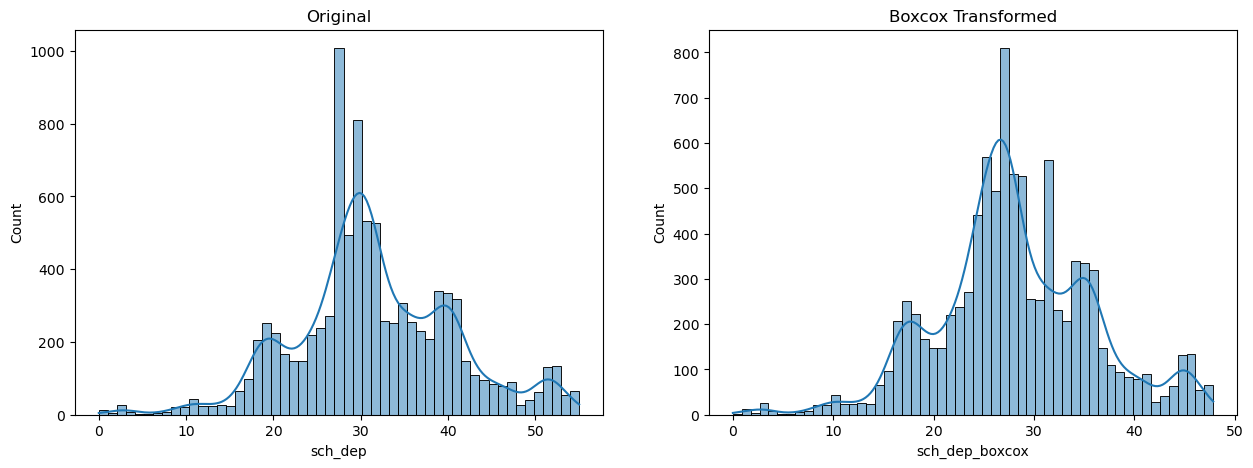

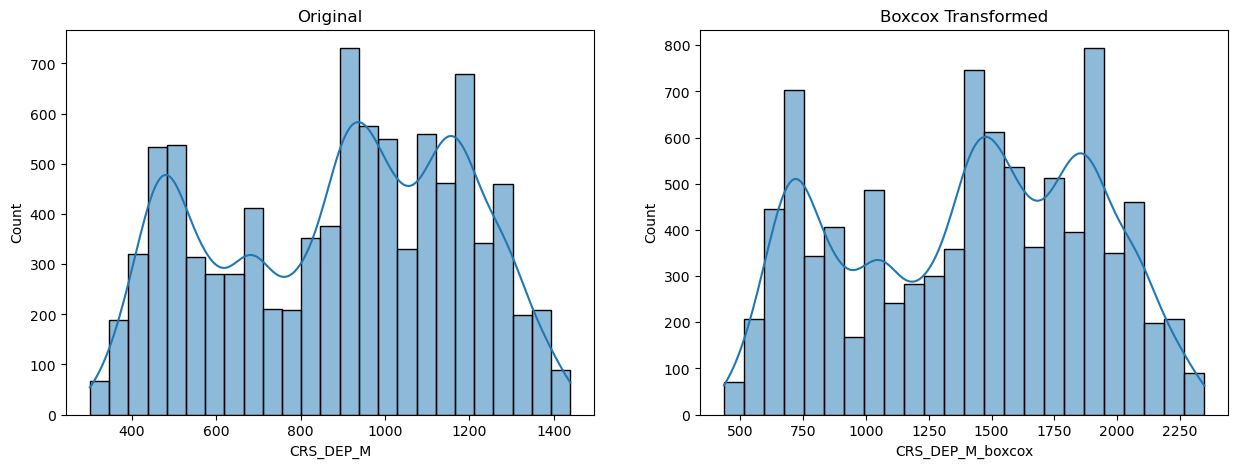

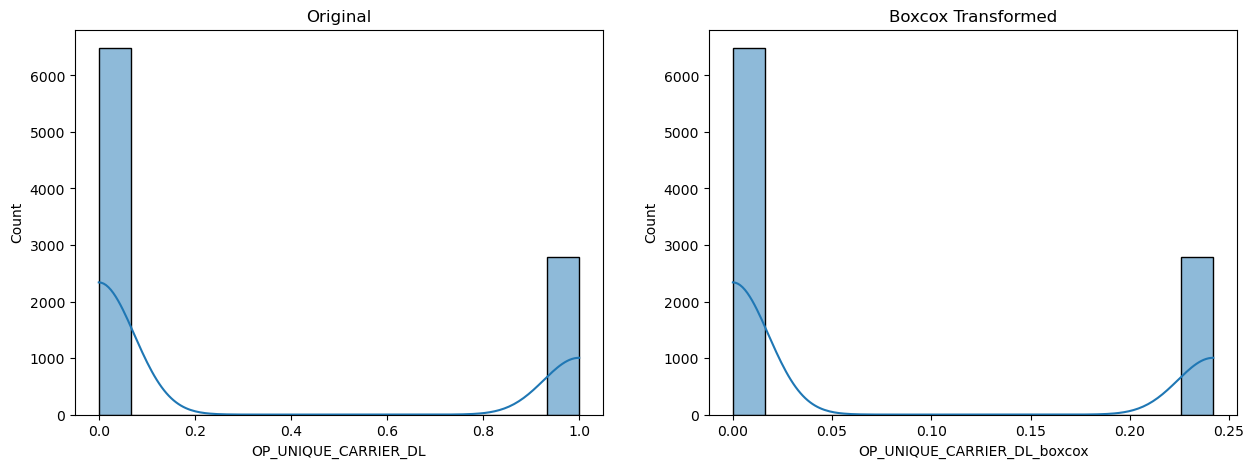

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X['sch_dep'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(X['sch_dep_boxcox'], kde=True, ax=axes[1])
axes[1].set_title('Boxcox Transformed')


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X['CRS_DEP_M'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(X['CRS_DEP_M_boxcox'], kde=True, ax=axes[1])
axes[1].set_title('Boxcox Transformed')


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X['OP_UNIQUE_CARRIER_DL'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(X['OP_UNIQUE_CARRIER_DL_boxcox'], kde=True, ax=axes[1])
axes[1].set_title('Boxcox Transformed')

/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

Text(0.5, 1.0, 'Boxcox Transformed')

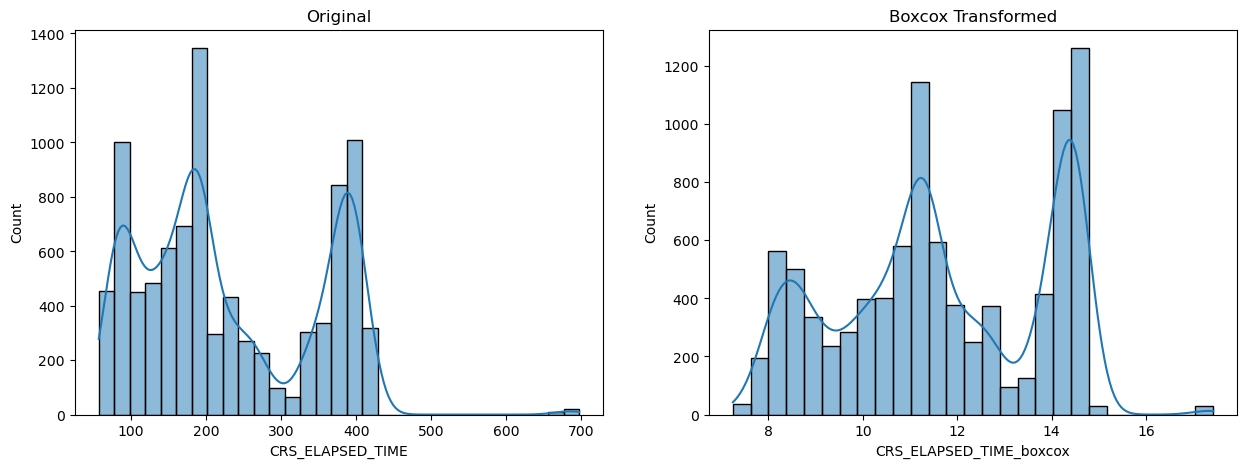

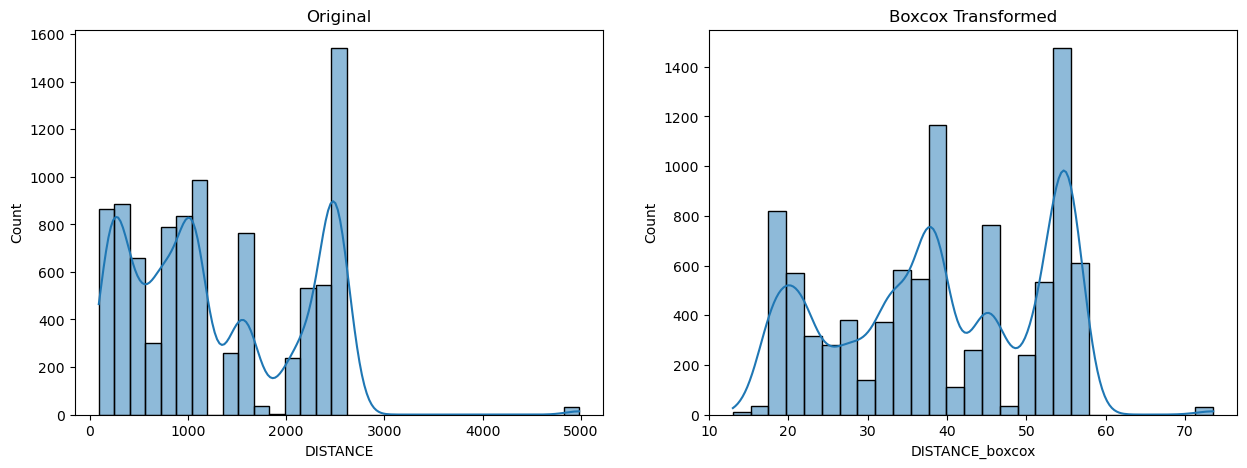

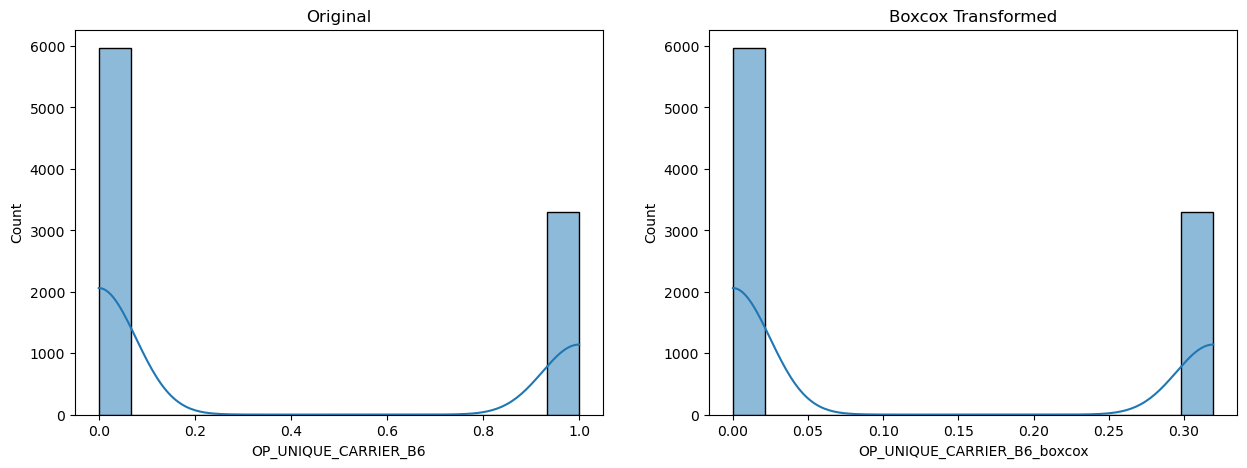

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X['CRS_ELAPSED_TIME'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(X['CRS_ELAPSED_TIME_boxcox'], kde=True, ax=axes[1])
axes[1].set_title('Boxcox Transformed')


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X['DISTANCE'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(X['DISTANCE_boxcox'], kde=True, ax=axes[1])
axes[1].set_title('Boxcox Transformed')



fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X['OP_UNIQUE_CARRIER_B6'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(X['OP_UNIQUE_CARRIER_B6_boxcox'], kde=True, ax=axes[1])
axes[1].set_title('Boxcox Transformed')

/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

Text(0.5, 1.0, 'Boxcox Transformed')

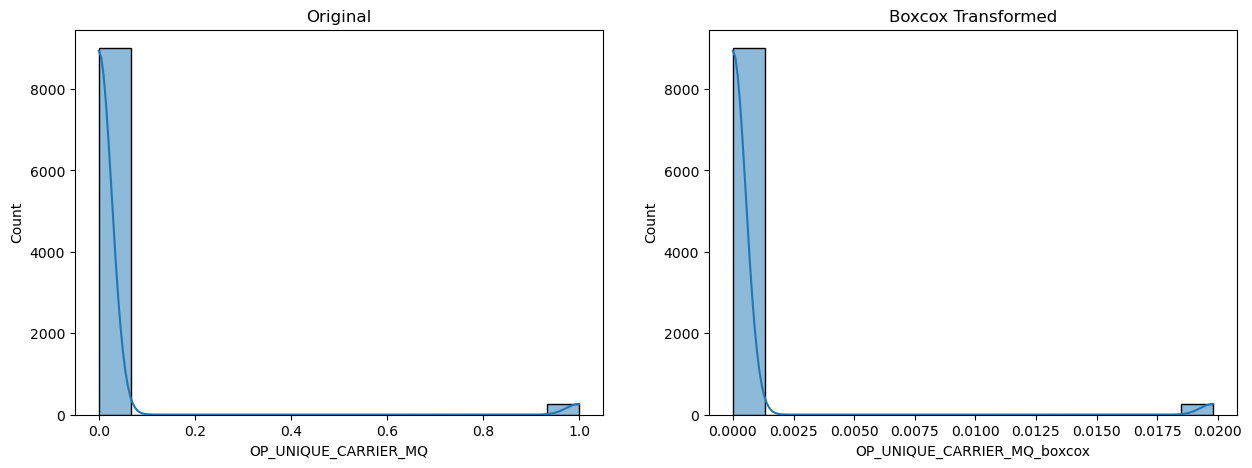

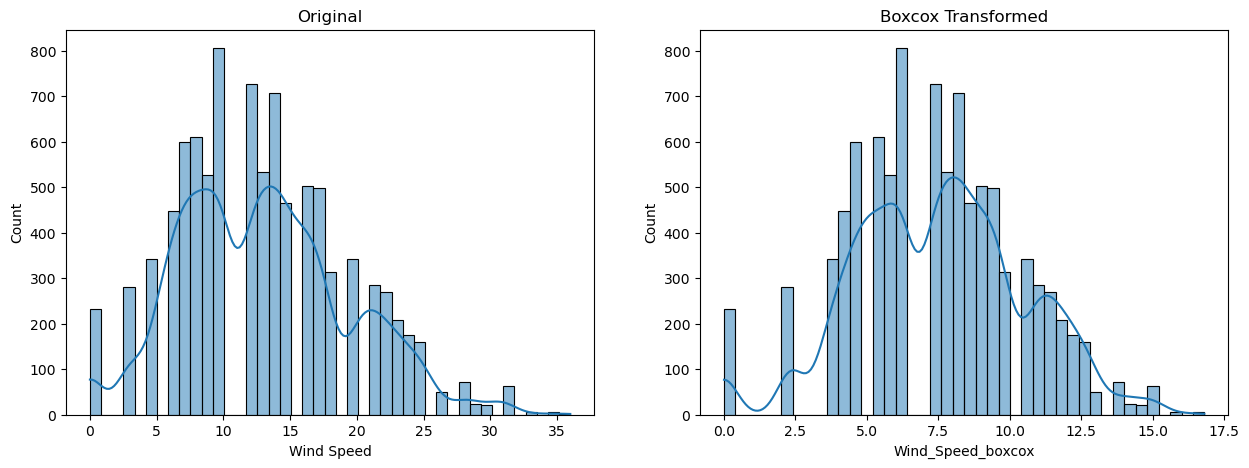

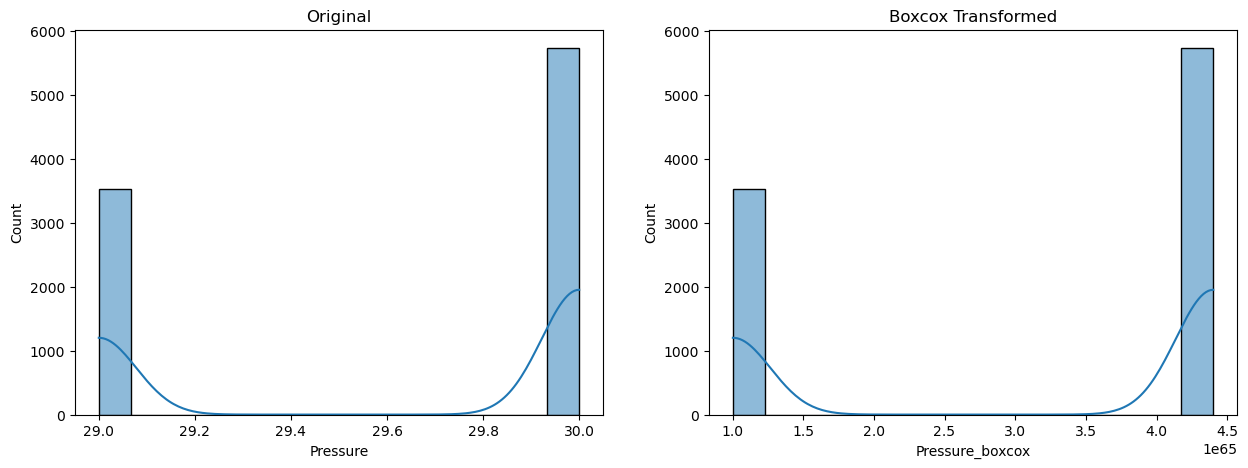

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X['OP_UNIQUE_CARRIER_MQ'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(X['OP_UNIQUE_CARRIER_MQ_boxcox'], kde=True, ax=axes[1])
axes[1].set_title('Boxcox Transformed')



fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X['Wind Speed'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(X['Wind_Speed_boxcox'], kde=True, ax=axes[1])
axes[1].set_title('Boxcox Transformed')



fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X['Pressure'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(X['Pressure_boxcox'], kde=True, ax=axes[1])
axes[1].set_title('Boxcox Transformed')